In [10]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

In [17]:
fukuimesh1 = gpd.read_file('data/presentation3data.zip')

In [18]:
fukuimesh = gpd.pd.concat([fukuimesh1])

<Axes: >

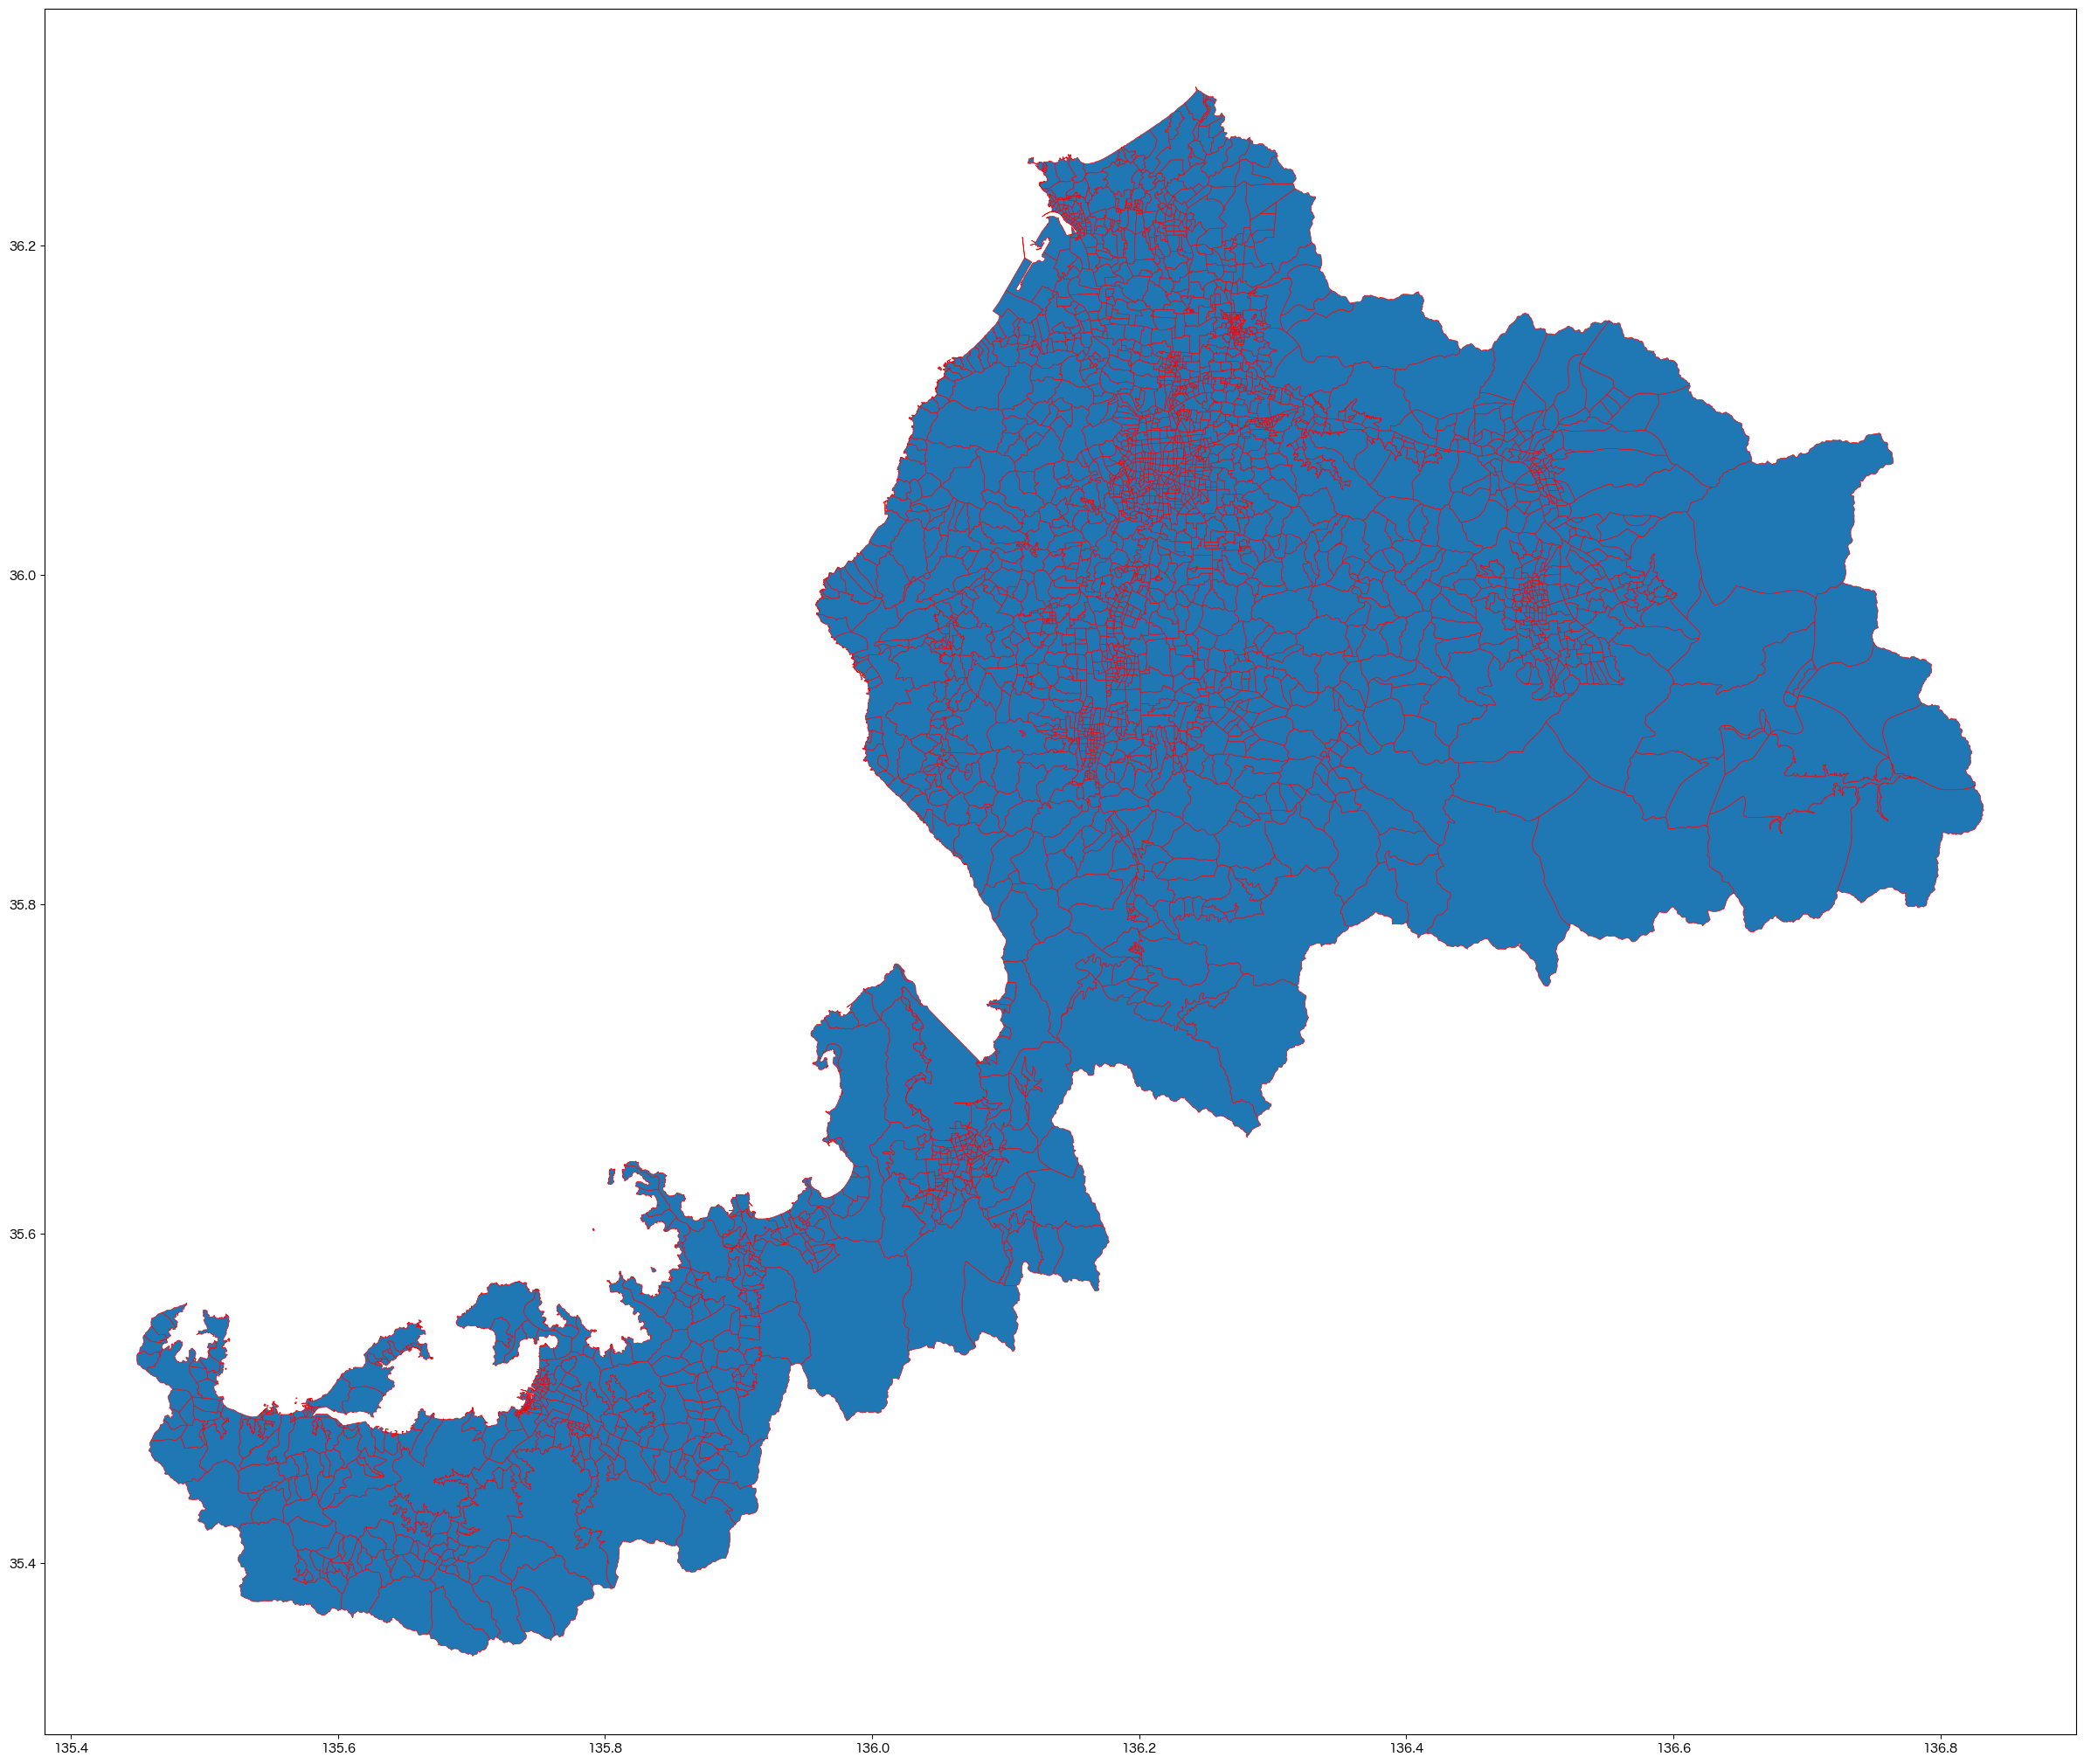

In [19]:
fukuimesh.plot(figsize=(30,30),edgecolor='red',linewidth=0.5)

In [20]:
fukuimesh.head()

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,N_KEN,N_CITY,KIGO_I,KBSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1,geometry
0,18,18,501,000000,福井県,若狭町,NaN,NaN,8101,12217.767,...,NaN,NaN,NaN,0,0,0,135.791397,35.602582,0000-00,"POLYGON ((135.79188 35.60192, 135.79172 35.601..."
1,182010010,18,201,001000,福井県,福井市,明里町,NaN,8101,146262.164,...,NaN,NaN,NaN,12,348,191,136.199130,36.060907,0010-00,"POLYGON ((136.19921 36.06301, 136.19939 36.063..."
2,182010030,18,201,003000,福井県,福井市,足谷町,NaN,8101,1484894.218,...,NaN,NaN,NaN,1,4,1,136.108947,36.076077,0030-00,"POLYGON ((136.11548 36.08178, 136.11548 36.081..."
3,18201004001,18,201,004001,福井県,福井市,足羽一丁目,NaN,8101,208288.799,...,NaN,NaN,NaN,27,715,303,136.209298,36.059308,0040-01,"POLYGON ((136.21044 36.06164, 136.21089 36.061..."
4,18201004002,18,201,004002,福井県,福井市,足羽二丁目,NaN,8101,82899.891,...,NaN,NaN,NaN,19,605,242,136.205254,36.060423,0040-02,"POLYGON ((136.20697 36.06164, 136.20698 36.061..."


In [21]:
fukuidata1 = pd.read_csv('data/pre3統計data.zip', encoding='cp932')

In [22]:
fukuidata1.head()

,KEY_CODE,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,T001081001,T001081002,T001081003,T001081004
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,人口総数,男,女,世帯総数
1,18201.0,1.0,福井市,NaN,0.0,NaN,NaN,262328,127867,134461,104470
2,182010010.0,2.0,福井市,明里町,0.0,NaN,NaN,348,178,170,191
3,182010030.0,2.0,福井市,足谷町,0.0,NaN,NaN,4,2,2,1
4,182010040.0,3.0,福井市,足羽,0.0,NaN,NaN,2814,1364,1450,1211


In [23]:
fukuidata1 = fukuidata1[1:]

In [24]:
fukuidata1 = fukuidata1.replace('*', np.nan)

In [25]:
fukuidata = pd.concat([fukuidata1])

In [27]:
fukuidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 1 to 3218
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    3218 non-null   float64
 1   HYOSYO      3218 non-null   float64
 2   CITYNAME    3218 non-null   object 
 3   NAME        3201 non-null   object 
 4   HTKSYORI    3218 non-null   float64
 5   HTKSAKI     0 non-null      float64
 6   GASSAN      0 non-null      float64
 7   T001081001  3218 non-null   object 
 8   T001081002  3218 non-null   object 
 9   T001081003  3218 non-null   object 
 10  T001081004  3218 non-null   object 
dtypes: float64(5), object(6)
memory usage: 276.7+ KB


In [28]:
fukuidata.columns

Index(['KEY_CODE', 'HYOSYO', 'CITYNAME', 'NAME', 'HTKSYORI', 'HTKSAKI',
       'GASSAN', 'T001081001', 'T001081002', 'T001081003', 'T001081004'],
      dtype='object')

In [29]:
fukuidata.columns[4:]

Index(['HTKSYORI', 'HTKSAKI', 'GASSAN', 'T001081001', 'T001081002',
       'T001081003', 'T001081004'],
      dtype='object')

In [30]:
fukuidata[fukuidata.columns[4:]]

,HTKSYORI,HTKSAKI,GASSAN,T001081001,T001081002,T001081003,T001081004
1,0.0,NaN,NaN,262328,127867,134461,104470
2,0.0,NaN,NaN,348,178,170,191
3,0.0,NaN,NaN,4,2,2,1
4,0.0,NaN,NaN,2814,1364,1450,1211
5,0.0,NaN,NaN,715,359,356,303
...,...,...,...,...,...,...,...
3214,0.0,NaN,NaN,99,49,50,30
3215,0.0,NaN,NaN,205,94,111,72
3216,0.0,NaN,NaN,150,70,80,48
3217,0.0,NaN,NaN,42,22,20,14


In [38]:
df = pd.DataFrame(fukuidata, columns = ['4'])

df['4'] = pd.to_numeric(df['4'],errors = 'coerce')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 1 to 3218
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   4       0 non-null      float64
dtypes: float64(1)
memory usage: 25.3 KB
None


In [40]:
fukuidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 1 to 3218
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    3218 non-null   float64
 1   HYOSYO      3218 non-null   float64
 2   CITYNAME    3218 non-null   object 
 3   NAME        3201 non-null   object 
 4   HTKSYORI    3218 non-null   float64
 5   HTKSAKI     0 non-null      float64
 6   GASSAN      0 non-null      float64
 7   T001081001  3218 non-null   object 
 8   T001081002  3218 non-null   object 
 9   T001081003  3218 non-null   object 
 10  T001081004  3218 non-null   object 
dtypes: float64(5), object(6)
memory usage: 276.7+ KB


In [41]:
fukuimesh['KEY_CODE']=fukuimesh['KEY_CODE'].astype(float)

In [42]:
fukuimesh = fukuimesh.merge(fukuidata, on='KEY_CODE')

In [43]:
fukuimesh.sample(5)

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,T001081001,T001081002,T001081003,T001081004
1605,1.820806e+08,18,208,059000,福井県,あわら市,山室,NaN,8101,3798045.219,...,2.0,あわら市,山室,0.0,NaN,NaN,313,148,165,97
1692,1.820811e+10,18,208,110003,福井県,あわら市,二面三丁目,NaN,8101,38934.841,...,4.0,あわら市,二面三丁目,0.0,NaN,NaN,105,57,48,50
1469,1.820702e+10,18,207,025000,福井県,鯖江市,北野町,NaN,8101,425958.556,...,4.0,鯖江市,北野町,0.0,NaN,NaN,324,161,163,115
2991,1.850108e+08,18,501,080000,福井県,若狭町,日笠,NaN,8101,4234020.097,...,2.0,若狭町,日笠,0.0,NaN,NaN,159,84,75,56
2154,1.821014e+08,18,210,141000,福井県,坂井市,新間,NaN,8101,148553.036,...,2.0,坂井市,新間,0.0,NaN,NaN,186,93,93,58


In [44]:
fukuimesh = fukuimesh.to_crs(3857)

In [45]:
fukuimesh

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,T001081001,T001081002,T001081003,T001081004
0,1.820100e+08,18,201,001000,福井県,福井市,明里町,NaN,8101,146262.164,...,2.0,福井市,明里町,0.0,NaN,NaN,348,178,170,191
1,1.820100e+08,18,201,003000,福井県,福井市,足谷町,NaN,8101,1484894.218,...,2.0,福井市,足谷町,0.0,NaN,NaN,4,2,2,1
2,1.820100e+10,18,201,004001,福井県,福井市,足羽一丁目,NaN,8101,208288.799,...,4.0,福井市,足羽一丁目,0.0,NaN,NaN,715,359,356,303
3,1.820100e+10,18,201,004002,福井県,福井市,足羽二丁目,NaN,8101,82899.891,...,4.0,福井市,足羽二丁目,0.0,NaN,NaN,605,281,324,242
4,1.820100e+10,18,201,004003,福井県,福井市,足羽三丁目,NaN,8101,92721.698,...,4.0,福井市,足羽三丁目,0.0,NaN,NaN,525,243,282,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1.850108e+08,18,501,084000,福井県,若狭町,武生,NaN,8101,945608.790,...,2.0,若狭町,武生,0.0,NaN,NaN,99,49,50,30
2996,1.850108e+08,18,501,085000,福井県,若狭町,玉置,NaN,8101,860011.156,...,2.0,若狭町,玉置,0.0,NaN,NaN,205,94,111,72
2997,1.850109e+08,18,501,086000,福井県,若狭町,上野木,NaN,8101,462756.552,...,2.0,若狭町,上野木,0.0,NaN,NaN,150,70,80,48
2998,1.850109e+08,18,501,087000,福井県,若狭町,中野木,NaN,8101,392152.760,...,2.0,若狭町,中野木,0.0,NaN,NaN,42,22,20,14
